In [163]:
import numpy as np
import pandas as pd

In [164]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [165]:
df = pd.read_csv(r"C:\Users\Shubhayan\Desktop\genetic_probs\data.csv",  on_bad_lines='skip')

In [166]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [167]:
df.shape

(669640, 2)

In [168]:
df.dropna(inplace=True)
df.isnull().sum()

password    0
strength    0
dtype: int64

In [169]:
x = np.array(df["password"])
y = np.array(df["strength"])

In [170]:
def word(password):
    character=[]
    for i in password:
        character.append(i)
    return character

In [171]:
tdif = TfidfVectorizer(tokenizer=word)
x = tdif.fit_transform(x)

c:\Users\Shubhayan\.conda\envs\genetic\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [172]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .25)

In [173]:
xtrain.shape

(502229, 153)

In [174]:
ytrain.shape

(502229,)

In [175]:
ytest

array([2, 1, 1, ..., 0, 0, 1], dtype=int64)

In [176]:
list(df.strength.unique())

[1, 2, 0]

In [177]:
model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class= list(df.strength.unique()),      
    max_depth=5,       
    learning_rate=.01, 
    n_estimators=10
)

In [178]:
model.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_class=[1, 2, 0], num_parallel_tree=None, ...)

In [179]:
predictions = model.predict(xtest)

In [180]:
from sklearn.metrics import accuracy_score, classification_report


In [181]:
accuracy = accuracy_score(ytest, predictions)

In [182]:
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(ytest, predictions))

Accuracy: 0.8317543754853354

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.12      0.20     22246
           1       0.83      0.97      0.90    124240
           2       0.88      0.75      0.81     20924

    accuracy                           0.83    167410
   macro avg       0.79      0.61      0.64    167410
weighted avg       0.81      0.83      0.79    167410



In [22]:
parameters = {'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}

Generating initial population....


100%|██████████| 6/6 [00:51<00:00,  8.57s/it]


Generation: 1	Fitness: 1.9788543097783844


100%|██████████| 6/6 [01:20<00:00, 13.35s/it]


Generation: 2	Fitness: 1.9788543097783844


100%|██████████| 6/6 [00:59<00:00,  9.87s/it]


Generation: 3	Fitness: 1.3779344125201618


100%|██████████| 6/6 [01:17<00:00, 12.99s/it]

Generation: 4	Fitness: 0.285407084403559


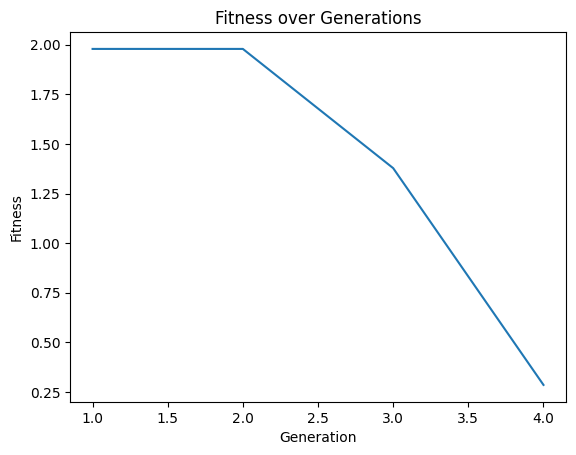

Best params: {'max_depth': 7, 'n_estimators': 200, 'learning_rate': 0.1}


In [162]:
import xgboost as xgb
import random
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm import tqdm

POPULATION_SIZE = 7
GENES = parameters
TARGET = 98 #target accuracy
MAX_GEN = 5 
# EARLY_STOPPING_STEP = 2

class individual(object):
    def __init__(self, chromosome):
        self.chromosome = chromosome #set of genes
        self.fitness = self.fitness_score() # loss function
    @classmethod
    #getting the genes
    def mutated_genes(self, gene): 
        global GENES 
        return random.choice(GENES[list(GENES.keys())[gene]])
    
    @classmethod
    #getiing the chromosomes
    def create_gnome(self): 
        global GENES 
        return [self.mutated_genes(i) for i in range(len(GENES))] 
    
    def mate(self, par2): 
        child_chromosome = [] 
        for gp in range(len(self.chromosome)):
            prob = random.random() 
            if prob < 0.25: 
                child_chromosome.append(self.chromosome[gp]) 
            elif prob < 0.50: 
                child_chromosome.append(par2.chromosome[gp]) 
            else: 
                child_chromosome.append(self.mutated_genes(gp)) 
        return individual(child_chromosome) 
    
    def fitness_score(self):
        global TARGET 
        fitness = 0
        # Assuming xtrain, ytrain, xtest, ytest are defined elsewhere
        model = xgb.XGBClassifier(
            objective='multi:softprob',
            num_class=3,  # Update this value based on the number of classes
            max_depth=self.chromosome[0], 
            n_estimators=self.chromosome[1], 
            learning_rate=self.chromosome[2]
        )
        model.fit(xtrain, ytrain)
        predictions = model.predict(xtest)
        accuracy = accuracy_score(ytest, predictions)
        # print(accuracy)
        fitness = TARGET - (accuracy * 100)
        return fitness 
    
def main(): 
    
    global POPULATION_SIZE 
    generation = 1
    found = False
    population = [] 
    fitness_history = []

    print("Generating initial population....")
    for _ in tqdm(range(POPULATION_SIZE)): 
        gnome = individual.create_gnome() 
        population.append(individual(gnome)) 
  
    while not found: 
        population = sorted(population, key=lambda x: x.fitness) 
        if population[0].fitness <= 0: 
            found = True
            break



        #elitism algorithm
        new_generation = [] 
        s = int((10*POPULATION_SIZE)/100) 
        new_generation.extend(population[:s]) 
        s = int((90*POPULATION_SIZE)/100) 
        for _ in tqdm(range(s)): 
            parent1 = random.choice(population[:int((50*POPULATION_SIZE)/100) ]) 
            parent2 = random.choice(population[:int((50*POPULATION_SIZE)/100) ]) 
            child = parent1.mate(parent2) 
            new_generation.append(child) 
        population = new_generation 
        fitness_history.append(population[0].fitness)
        print("Generation: {}\tFitness: {}".format(generation, population[0].fitness)) 
        generation += 1
        if generation == MAX_GEN:
            break
        # elif fitness_history
    # Plotting fitness over generations
    plt.plot(range(1, generation), fitness_history)
    plt.title('Fitness over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.show()
    
    print('Best params:', {list(GENES.keys())[i]: population[0].chromosome[i] for i in range(len(GENES.keys()))})
if __name__ == '__main__': 
    main() 


In [138]:
population = []
gnome = individual.create_gnome() 
population.append(individual(gnome)) 

In [145]:
print(population[0].chromosome)

[5, 100, 0.1]


In [183]:
optimised_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class= list(df.strength.unique()),      
    max_depth =  7, n_estimators = 200, learning_rate =  0.1
)

In [184]:
optimised_model.fit(xtrain, ytrain)
predictions = optimised_model.predict(xtest)
accuracy = accuracy_score(ytest, predictions)

In [185]:
accuracy

0.9775341974792425